In [110]:
#LIBRARIES
import numpy as np
import pandas as pd

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
#DATASSET
df = pd.read_csv('cancer.csv')

In [113]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [116]:
df.shape

(569, 33)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [118]:
#TO CHECK NULL VALUES, IF ANY 
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [119]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

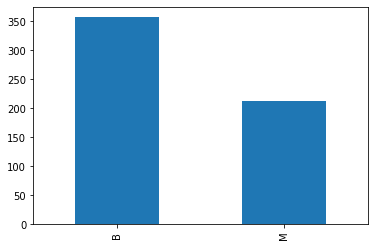

In [120]:
df.diagnosis.value_counts().plot(kind='bar')

In [121]:
#df.columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016858E759B0>,
      dtype=object)

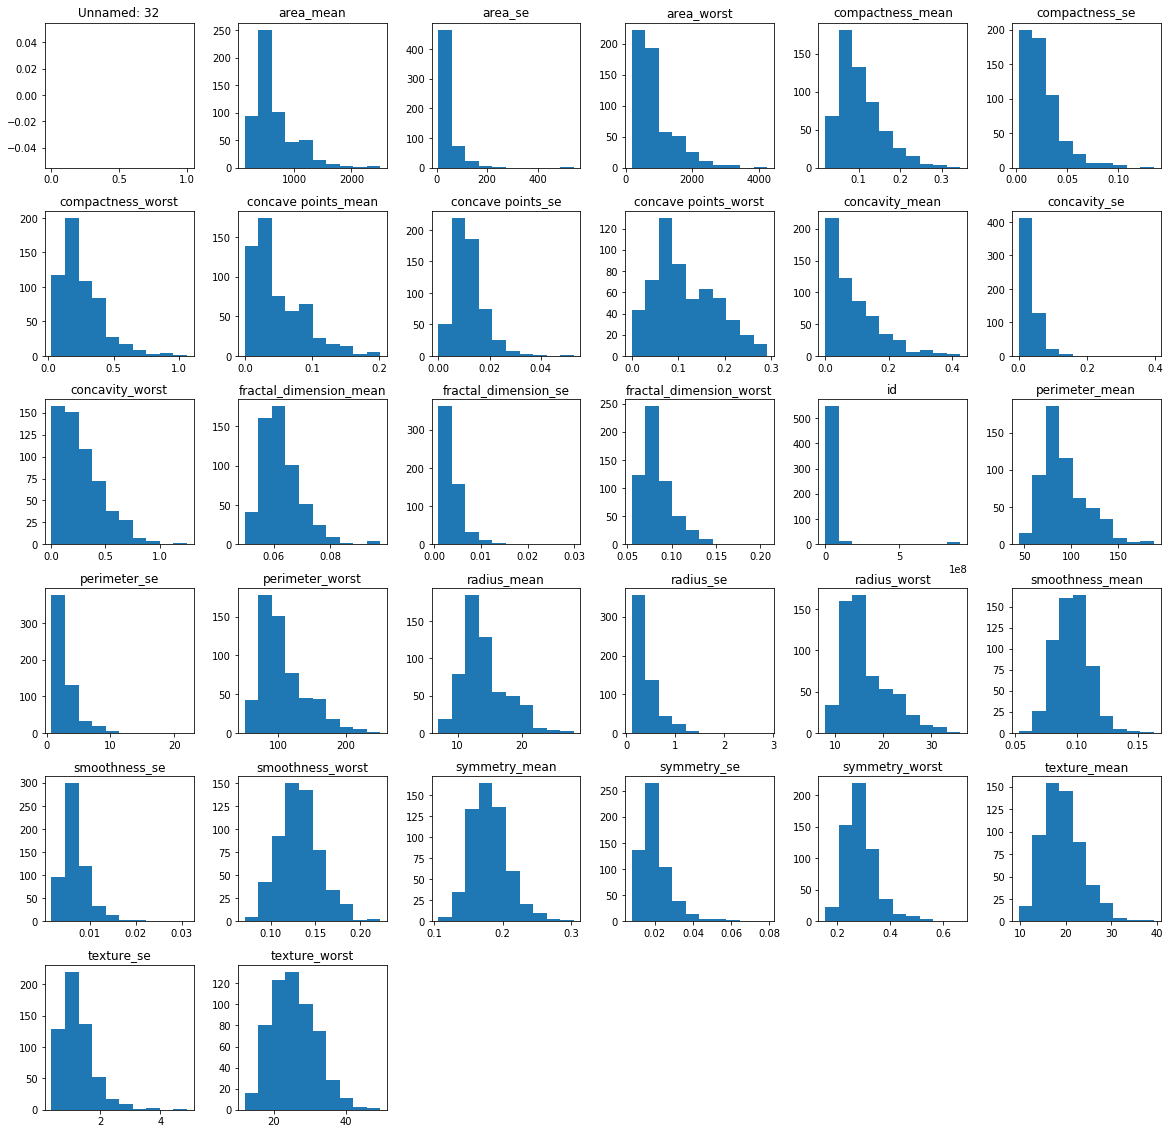

In [122]:
#VISUALIZATION 
df.hist(bins=10,figsize=(20,20),grid=False)

In [123]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [124]:
init_notebook_mode(connected=True)

In [125]:
cf.go_offline()

In [126]:
#df=pd.DataFrame(np.random.randn(100,11),columns='radius_worst texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave points_worst symmetry_worst fractal_dimension_worst'.split()) 

In [127]:
#df.head()

In [128]:
#df.iplot(kind='box')

In [129]:
cancer_mapping = {'B':0, 'M':1}
df.diagnosis=df.diagnosis.map(cancer_mapping)

In [130]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [131]:
#to check duplicacy
df.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
539    False
540    False
541    False
542    False
543    False
544    False
545    False
546    False
547    False
548    False
549    False
550    False
551    False
552    False
553    False
554    False
555    False
556    False
557    False
558    False
559    False
560    False
561    False
562    False
563    False
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [132]:
#unique identity=id
df.id.value_counts().unique()

array([1], dtype=int64)

In [133]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [134]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [135]:
#Dimensional reduction
y=df['diagnosis']
X=df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

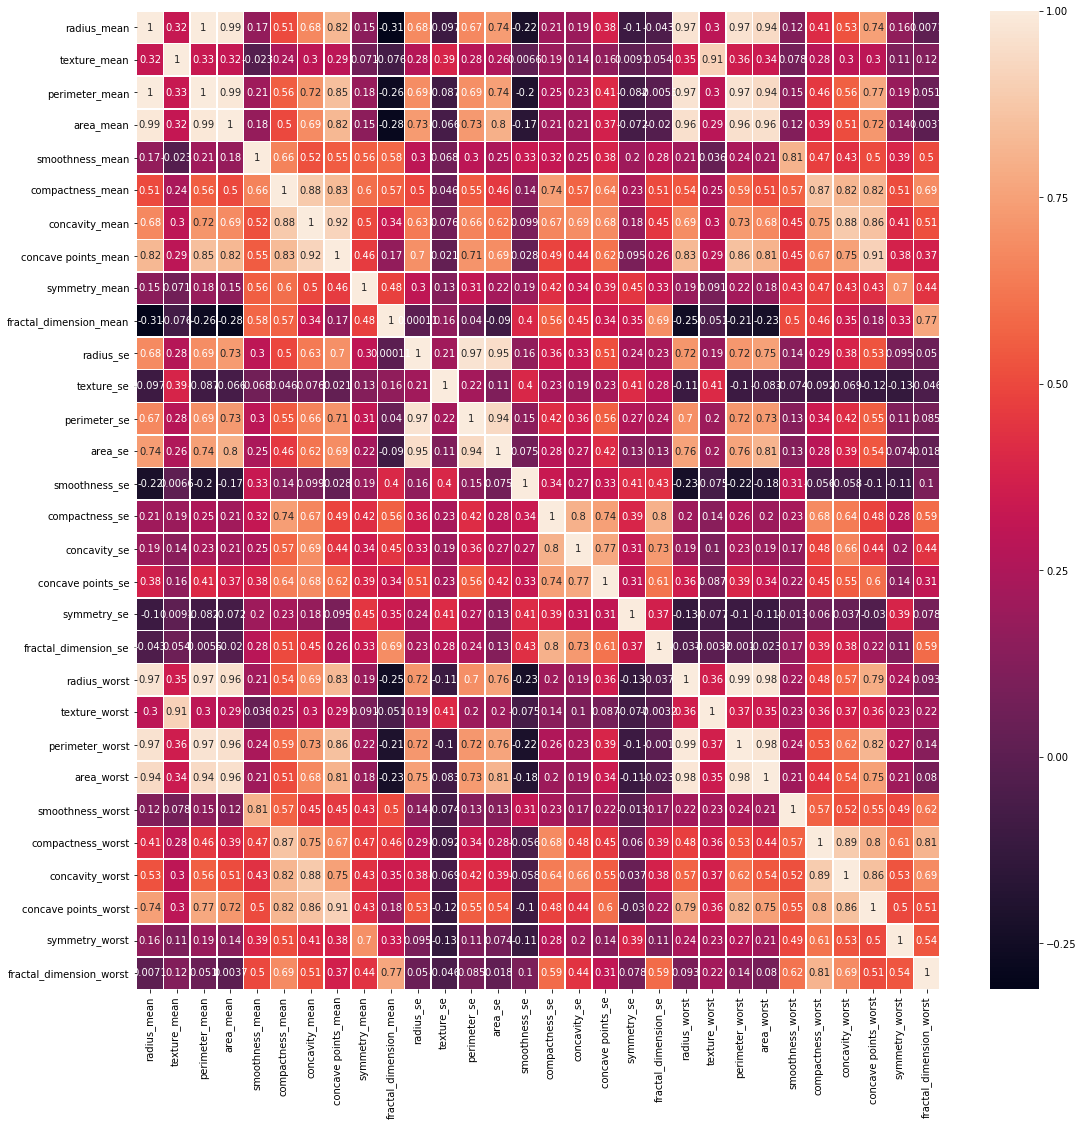

In [136]:
#correlation map
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(X.corr(),annot=True,linewidth=.5)


In [137]:
#high correlation,threshold=90% , 0.90
high_corr_pts=X[['radius_mean','perimeter_mean','area_mean','radius_worst','perimeter_worst']]

Text(0.5, 1.0, 'Radius mean w.r.t Diagnosis')

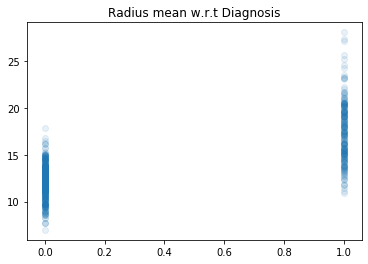

In [138]:
#for transparent plot,we need low alpha value
plt.scatter(df.diagnosis,df.radius_mean,alpha=0.1)
plt.title('Radius mean w.r.t Diagnosis')

Text(0.5, 1.0, 'Perimeter mean w.r.t Diagnosis')

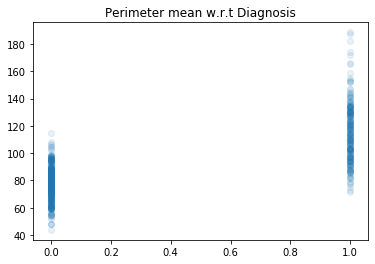

In [139]:
plt.scatter(df.diagnosis,df.perimeter_mean,alpha=0.1)
plt.title('Perimeter mean w.r.t Diagnosis')

Text(0.5, 1.0, 'Area mean w.r.t Diagnosis')

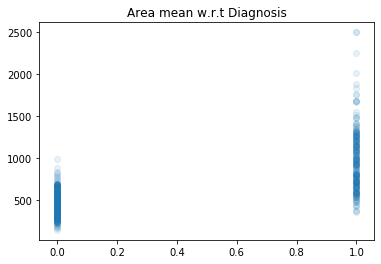

In [140]:
plt.scatter(df.diagnosis,df.area_mean,alpha=0.1)
plt.title('Area mean w.r.t Diagnosis')

Text(0.5, 1.0, 'Perimeter worst w.r.t Diagnosis')

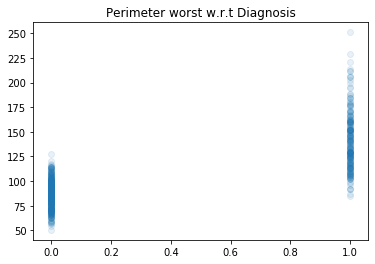

In [141]:
plt.scatter(df.diagnosis,df.perimeter_worst,alpha=0.1)
plt.title('Perimeter worst w.r.t Diagnosis')

In [142]:
#Splitting the dataset
#40% test and 60% train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

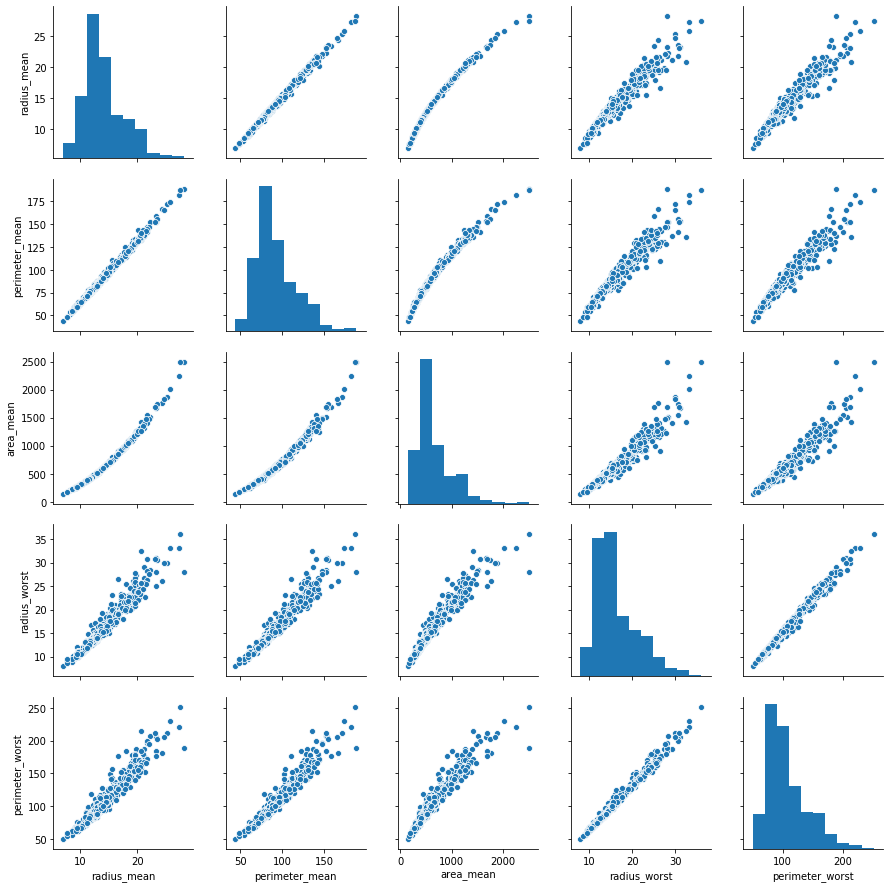

In [143]:
sns.pairplot(high_corr_pts)

In [144]:
import xgboost as xgb

In [145]:
model_all = xgb.XGBClassifier()

In [146]:
model_all.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [147]:
pred=model_all.predict(X_test)

In [148]:
accuracy_score(y_test,pred)

0.9649122807017544

In [149]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       149
           1       0.94      0.96      0.95        79

    accuracy                           0.96       228
   macro avg       0.96      0.96      0.96       228
weighted avg       0.97      0.96      0.97       228



In [150]:
confusion_matrix(y_test,pred)

array([[144,   5],
       [  3,  76]], dtype=int64)

In [151]:
#accuracy=95.61%

In [152]:
#Optimal features
from sklearn.feature_selection import RFECV

In [153]:
#Accuracy scoring is proportional to number of correct classifciations
clf=xgb.XGBClassifier()
rfecv=RFECV(estimator=clf,step=1,cv=5,scoring='accuracy') #5-fold cross validation
rfecv=rfecv.fit(X_train,y_train)

print('Optimal number of features:' , rfecv.n_features_)
print('Best features:',X_train.columns[rfecv.support_])

Optimal number of features: 20
Best features: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concave points_mean', 'texture_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')


<function matplotlib.pyplot.show(*args, **kw)>

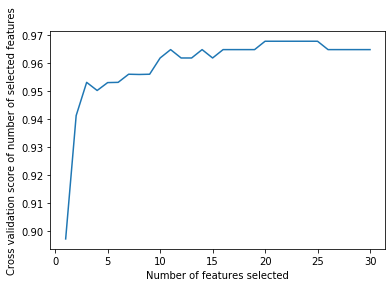

In [154]:
#VS. cross validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score of number of selected features')
plt.plot(range(1,len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show

In [155]:
#ranking features according to their importance
importances=(model_all.feature_importances_)
indices=np.argsort(importances)[::-1]
print('Feature ranking:')
for f in range(X_train.shape[1]):
    print('%d. feature %d (%f)' % (f + 1,indices[f], importances[indices[f]])) 

Feature ranking:
1. feature 22 (0.472489)
2. feature 27 (0.116467)
3. feature 7 (0.087924)
4. feature 23 (0.061908)
5. feature 20 (0.030878)
6. feature 21 (0.023111)
7. feature 3 (0.020821)
8. feature 14 (0.017698)
9. feature 16 (0.015113)
10. feature 2 (0.014407)
11. feature 1 (0.013864)
12. feature 0 (0.013505)
13. feature 11 (0.012486)
14. feature 26 (0.011481)
15. feature 5 (0.011163)
16. feature 24 (0.010351)
17. feature 28 (0.009921)
18. feature 15 (0.009816)
19. feature 25 (0.008162)
20. feature 13 (0.007703)
21. feature 19 (0.004649)
22. feature 9 (0.004563)
23. feature 6 (0.003990)
24. feature 12 (0.003976)
25. feature 29 (0.003947)
26. feature 18 (0.003577)
27. feature 4 (0.003190)
28. feature 10 (0.002572)
29. feature 8 (0.000268)
30. feature 17 (0.000000)


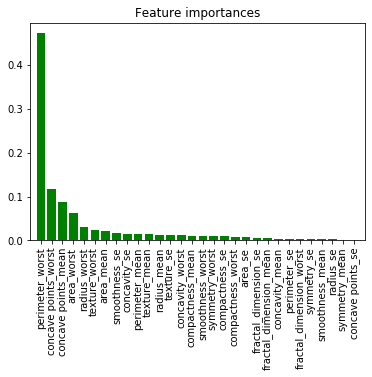

In [156]:
#plotting important features
plt.title('Feature importances')
plt.bar(range(X_train.shape[1]),importances[indices], color='g',align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
plt.show()

In [157]:
#train and analyse model with optimal features
X_train_optimal=X_train[['texture_mean', 'area_mean', 'concavity_mean', 'radius_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'concavity_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst']]
X_test_optimal=X_test[['texture_mean', 'area_mean', 'concavity_mean', 'radius_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'concavity_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst']]
model_optimal=xgb.XGBClassifier()
model_optimal.fit(X_train_optimal,y_train)
pred = model_optimal.predict(X_test_optimal)
accuracy_score(y_test,pred)

0.9517543859649122

In [158]:
#KNN
import numpy as np
from sklearn import preprocessing, model_selection, neighbors
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot

cf.go_offline()
df = pd.read_csv('cancer.csv')
df.replace('?', 99, inplace=True)
df.drop(['id'], 1, inplace=True)
df.head()
df.iplot(kind='box')

y=df['diagnosis']
X=df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.956140350877193


In [159]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Fitting the Logistic Regression Algorithm to the Training Set
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(X_train, y_train)
#95.8 Acuracy

#Fitting SVM
#from sklearn.svm import SVC
#classifier = SVC(kernel = 'linear', random_state = 0)
#classifier.fit(X_train, y_train) 
#accuracy=classifier.score(X_test, y_test)
#print(accuracy)
#97.2 Acuracy

#Fitting K-SVM
#from sklearn.svm import SVC
#classifier = SVC(kernel = 'rbf', random_state = 0)
#classifier.fit(X_train, y_train)
#96.5 Acuracy

#Fitting Naive_Bayes
#from sklearn.naive_bayes import GaussianNB
#classifier = GaussianNB()
#classifier.fit(X_train, y_train)
#91.6 Acuracy

#Fitting Decision Tree Algorithm
#from sklearn.tree import DecisionTreeClassifier
#classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#classifier.fit(X_train, y_train)
#95.8 Acuracy

#Fitting Random Forest Classification Algorithm
#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
#classifier.fit(X_train, y_train)
#98.6 Acuracy

#Fitting K-NN Algorithm
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#classifier.fit(X_train, y_train)
#95.1 Acuracy


#predicting the Test set results
#y_pred = classifier.predict(X_test)

#Creating the confusion Matrix
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)
#c = print(cm[0, 0] + cm[1, 1])


In [160]:
#Fitting SVM
import numpy as np
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
y=df['diagnosis']
X=df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
cf.go_offline()
df = pd.read_csv('cancer.csv')
df.replace('?', 99, inplace=True)
df.drop(['id'], 1, inplace=True)
df.head()
df.iplot(kind='box')
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train) 
accuracy=classifier.score(X_test, y_test)
print(accuracy)
#from sklearn.metrics import classification_report
#print(classification_report(y_test,y_pred))

0.972027972027972


In [161]:
#Fitting K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
y=df['diagnosis']
X=df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
cf.go_offline()
df = pd.read_csv('cancer.csv')
df.replace('?', 99, inplace=True)
df.drop(['id'], 1, inplace=True)
df.head()
df.iplot(kind='box')
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
accuracy=classifier.score(X_test,y_test)
print(accuracy)
#95.1 Acuracy


0.951048951048951


In [162]:
#Fitting Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
y=df['diagnosis']
X=df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
cf.go_offline()
df = pd.read_csv('cancer.csv')
df.replace('?', 99, inplace=True)
df.drop(['id'], 1, inplace=True)
df.head()
df.iplot(kind='box')
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
accuracy=classifier.score(X_test,y_test)
print(accuracy)
#98.6 Acuracy


0.986013986013986


In [163]:
#Fitting K-SVM
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
y=df['diagnosis']
X=df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
cf.go_offline()
df = pd.read_csv('cancer.csv')
df.replace('?', 99, inplace=True)
df.drop(['id'], 1, inplace=True)
df.head()
df.iplot(kind='box')
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
accuracy=classifier.score(X_test,y_test)
print(accuracy)
#96.5 Acuracy

0.965034965034965


In [164]:
#Fitting Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
y=df['diagnosis']
X=df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
cf.go_offline()
df = pd.read_csv('cancer.csv')
df.replace('?', 99, inplace=True)
df.drop(['id'], 1, inplace=True)
df.head()
df.iplot(kind='box')
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
accuracy=classifier.score(X_test,y_test)
print(accuracy)
#95.8 Acuracy

0.958041958041958


In [1]:
from tkinter import *
from PIL import Image,ImageTk
import cv2
import numpy as np
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
  
root=Tk()
#labelaccuracy
label_Accuracy=Label(root,text="",width=25,font="Helvetica 20 bold")
label_Accuracy.grid(row=40,column=1)

def SVM13():

    df = pd.read_csv('cancer.csv')
    y=df['diagnosis']
    X=df[['radius_mean', 'texture_mean', 'perimeter_mean',
           'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
           'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
           'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
            'fractal_dimension_se', 'radius_worst', 'texture_worst',
           'perimeter_worst', 'area_worst', 'smoothness_worst',
           'compactness_worst', 'concavity_worst', 'concave points_worst',
           'symmetry_worst', 'fractal_dimension_worst']]
    cf.go_offline()
    df = pd.read_csv('cancer.csv')
    df.replace('?', 99, inplace=True)
    df.drop(['id'], 1, inplace=True)
    df.head()
    #df.iplot(kind='box')
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(X_train, y_train) 
    accuracy=classifier.score(X_test, y_test)
    label_Accuracy.config(text="Accuracy is:"+str(accuracy))
    #accuracy=0.972
def KNN():
    
    y=df['diagnosis']
    X=df[['radius_mean', 'texture_mean', 'perimeter_mean',
           'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
           'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
           'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
           'fractal_dimension_se', 'radius_worst', 'texture_worst',
           'perimeter_worst', 'area_worst', 'smoothness_worst',
           'compactness_worst', 'concavity_worst', 'concave points_worst',
           'symmetry_worst', 'fractal_dimension_worst']]
    cf.go_offline()
    df = pd.read_csv('cancer.csv')
    df.replace('?', 99, inplace=True)
    df.drop(['id'], 1, inplace=True)
    df.head()
    df.iplot(kind='box')
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    accuracy=classifier.score(X_test,y_test)
    print(accuracy)
    label_Accuracy.config(text="Accuracy is:"+str(accuracy))
    #95.1 Acuracy


def Random_Forest_Tree():
    y=df['diagnosis']
    X=df[['radius_mean', 'texture_mean', 'perimeter_mean',
           'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
           'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
           'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
           'fractal_dimension_se', 'radius_worst', 'texture_worst',
           'perimeter_worst', 'area_worst', 'smoothness_worst',
           'compactness_worst', 'concavity_worst', 'concave points_worst',
           'symmetry_worst', 'fractal_dimension_worst']]
    cf.go_offline()
    df = pd.read_csv('cancer.csv')
    df.replace('?', 99, inplace=True)
    df.drop(['id'], 1, inplace=True)
    df.head()
    df.iplot(kind='box')
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    accuracy=classifier.score(X_test,y_test)
    print(accuracy)
    label_Accuracy.config(text="Accuracy is:"+str(accuracy))
#98.6 Acuracy

def K_SVM():
    #Fitting K-SVM
    y=df['diagnosis']
    X=df[['radius_mean', 'texture_mean', 'perimeter_mean',
           'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
           'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
           'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
           'fractal_dimension_se', 'radius_worst', 'texture_worst',
           'perimeter_worst', 'area_worst', 'smoothness_worst',
           'compactness_worst', 'concavity_worst', 'concave points_worst',
           'symmetry_worst', 'fractal_dimension_worst']]
    cf.go_offline()
    df = pd.read_csv('cancer.csv')
    df.replace('?', 99, inplace=True)
    df.drop(['id'], 1, inplace=True)
    df.head()
    df.iplot(kind='box')
    classifier = SVC(kernel = 'rbf', random_state = 0)
    classifier.fit(X_train, y_train)
    accuracy=classifier.score(X_test,y_test)
    label_Accuracy.config(text="Accuracy is:"+str(accuracy))
#96.5 Acuracy

def Decision_Tree():
    y=df['diagnosis']
    X=df[['radius_mean', 'texture_mean', 'perimeter_mean',
           'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
           'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
           'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
           'fractal_dimension_se', 'radius_worst', 'texture_worst',
           'perimeter_worst', 'area_worst', 'smoothness_worst',
           'compactness_worst', 'concavity_worst', 'concave points_worst',
           'symmetry_worst', 'fractal_dimension_worst']]
    cf.go_offline()
    df = pd.read_csv('cancer.csv')
    df.replace('?', 99, inplace=True)
    df.drop(['id'], 1, inplace=True)
    df.head()
    df.iplot(kind='box')
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    accuracy=classifier.score(X_test,y_test)
    label_Accuracy.config(text="Accuracy is:"+str(accuracy))
#95.8 Acuracy

    


root.title("Breast Cancer Detection")
root.geometry("800x800") 



#Label1
var=StringVar()
label1=Label(root,textvariable=var,width=35,font="Helvetica 20 bold")
var.set("Select the Machine Learning Algorithm")
label1.grid(row=0,sticky=W,padx=10,pady=20) #col=0

var=StringVar()
label2=Label(root,textvariable=var,width=35,font="Helvetica 20 bold")
var.set("Select the Model")
label2.grid(row=0,column=1,pady=20)

#Label2
var2=StringVar()
label3=Label(root,textvariable=var2)
label3.grid(row=3,column=1)

#Image of Results
image=Image.open("cancer_awareness.png")
resized=image.resize((700,500),Image.ANTIALIAS)
photo=ImageTk.PhotoImage(resized)
#label=Label(root,image=photo)
#label.image=photo
#label.grid(row=20,columnspan=4,sticky=W,padx=10,pady=10)

mb_var=StringVar()
mb_var.set("Model Selection")
mb=OptionMenu(root,mb_var,())
mb.configure(width=20)
mb.grid(row=1,column=1)

def reset_option_menu(options,index=None):
    
 menu=mb["menu"]
 menu.delete(0,"end")
 for string in options:
    menu.add_command(label=string,command=lambda value=string:mb_var.set(value))
 if index is not None:
    mb_var.set(options[index])

def a():
    reset_option_menu(["SVM","KNN","Random Forest Tree","K-SVM","Decision Tree"],0)
    
def default():
    reset_option_menu([""],0)

def c():
    var="The Selected Model is "+mb_var.get()
    var2.set(var)
    
def d():
    var=mb_var.get()

    if var == "SVM":
    
        image1=Image.open("SVM.png")
        resized=image1.resize((700,500),Image.ANTIALIAS)
        photo1=ImageTk.PhotoImage(resized)
        #label.configure(image=photo1)
        #label.image=photo1
        SVM_result()
        
       # label_Accuarcy.config(text="Accuracy is: ",)
    
    elif var == "KNN":
        image2=Image.open("KNN.png")
        resized=image2.resize((700,500),Image.ANTIALIAS)
        photo2=ImageTk.PhotoImage(resized)
        #label.configure(image=photo2)
        #label.image=photo2
        KNN_result()
    
    elif var == "Random Forest Tree":
        image3=Image.open("Random_Forest_Tree.png")
        resized=image3.resize((700,500),Image.ANTIALIAS)
        photo3=ImageTk.PhotoImage(resized)
        #label.configure(image=photo3)
        #label.image=photo3
        Random_Forest_Tree_result()
    
    
    elif var == "K-SVM":
        image4=Image.open("K-SVM.png")
        resized=image4.resize((700,500),Image.ANTIALIAS)
        photo4=ImageTk.PhotoImage(resized)
        #label.configure(image=photo4)
       # label.image=photo4
        K_SVM_result()
    
    elif var == "Decision Tree":
        image5=Image.open("Decision_Tree.png")
        resized=image5.resize((700,500),Image.ANTIALIAS)
        photo5=ImageTk.PhotoImage(resized)
       # label.configure(image=photo5)
       # label.image=photo5
        Decision_Tree_result()
    


#Radio Button
var1=IntVar()
R1=Radiobutton(root,text="Supervised Learning",variable=var1,value=1,command=a)
R1.grid(row=1,sticky=W,padx=20)

default()

B=Button(root,text="Set Model",font="Helvetica 14",relief=RAISED,command=c)
B.grid(row=3,sticky=W,padx=10,pady=10)

B=Button(root,text="Calculate Result",font="Helvetica 14",relief=RAISED,command=d)
B.grid(row=4,column=1,sticky=W,padx=10,pady=10)

#var2=IntVar()
#r1=Radiobutton(root,text="Wisconsin Dataset",variable=var2,value=3,command=e)


root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\users\jasmine awatramani\appdata\local\programs\python\python37\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-1-bb9c38b94862>", line 209, in d
    SVM_result()
NameError: name 'SVM_result' is not defined


In [109]:
accuracy

0.965034965034965